> بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ<small>  
Bismillāh ir-raḥmān ir-raḥīm

In the name of God, the Most Gracious, the Most Merciful  
Em nome de Deus, o Clemente, o Misericordioso</small>

# Imports

In [18]:
# #
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from plot_utils import explore_distribution
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Code

In [19]:
df = pd.read_csv('TelecomX_Data_Transformed.csv')
df.drop(columns=['CustomerID', 'Demographics'], inplace=True) # Dropping unnecessary features
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Mensal,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fibra Ótica,No,...,Yes,No,No,No,Mensal,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fibra Ótica,No,...,Yes,No,Yes,Yes,Mensal,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fibra Ótica,No,...,No,Yes,Yes,No,Mensal,Yes,Mailed check,83.9,267.40,2.796667


## Exploratory Data Analysis

### Exploring distributions

Studying continous features `['Monthly', 'Daily', 'Total', 'Tenure']`

#### Overall

##### Monthly

=> Exploration of Monthly:

Monthly
20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.216539
kurtosis   -1.261512
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Monthly, dtype: float64
------------------------------


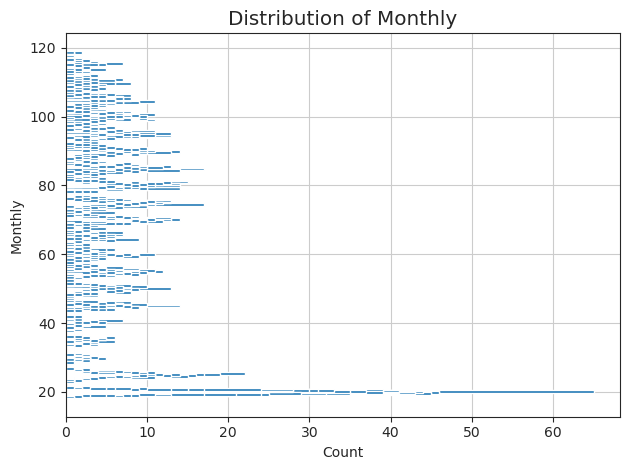

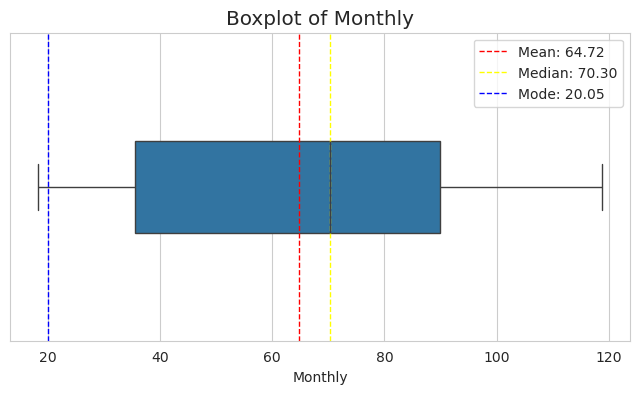

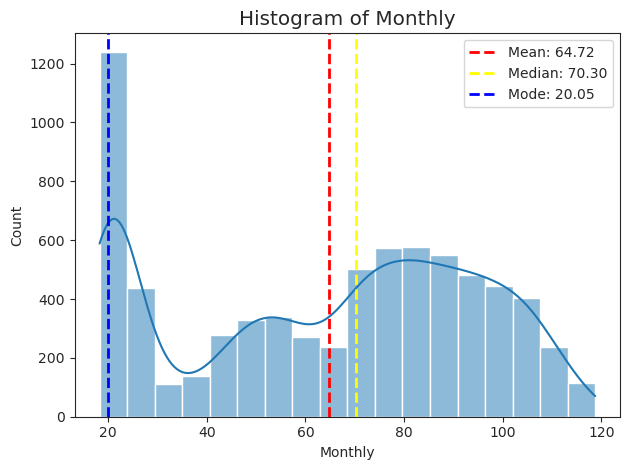

In [21]:
explore_distribution(df, 'Monthly')

##### Daily

=> Exploration of Daily:

Daily
0.668333    65
0.661667    46
0.663333    46
0.656667    45
0.651667    45
            ..
0.781667     1
3.885000     1
3.561667     1
2.285000     1
2.261667     1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.216539
kurtosis   -1.261512
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Daily, dtype: float64
------------------------------


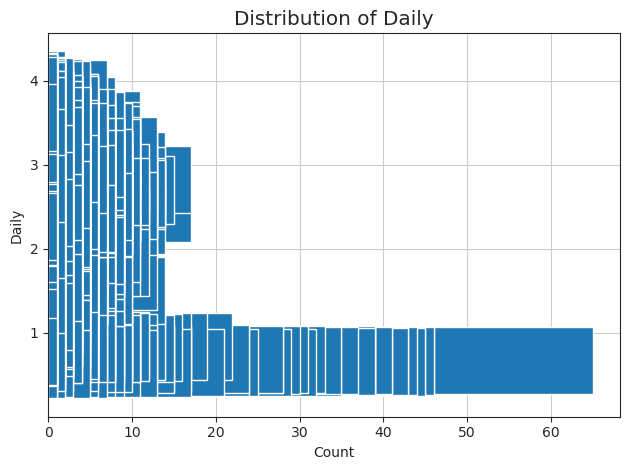

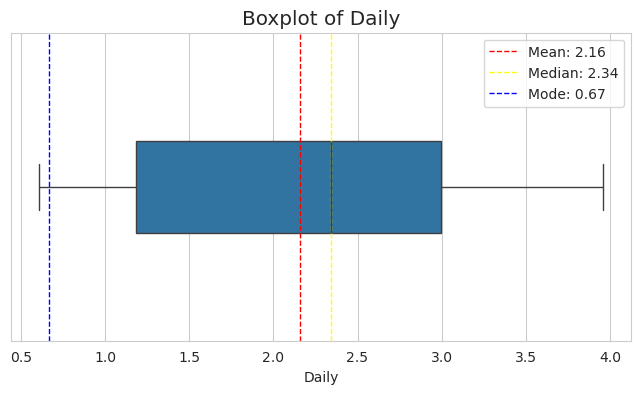

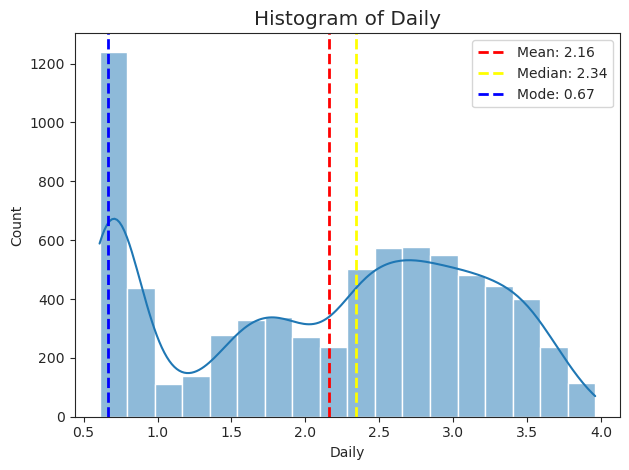

In [22]:
explore_distribution(df, 'Daily')

##### Total

=> Exploration of Total:

Total
0.00       11
20.20      11
19.75       9
19.55       9
19.90       9
           ..
272.00      1
1426.45     1
371.60      1
6786.40     1
3707.60     1
Name: count, Length: 6531, dtype: int64
------------------------------
Info:

skewness    0.965766
kurtosis   -0.227330
count    7267.000000
mean     2277.182035
std      2268.648587
min         0.000000
25%       396.200000
50%      1389.200000
75%      3778.525000
max      8684.800000
Name: Total, dtype: float64
------------------------------


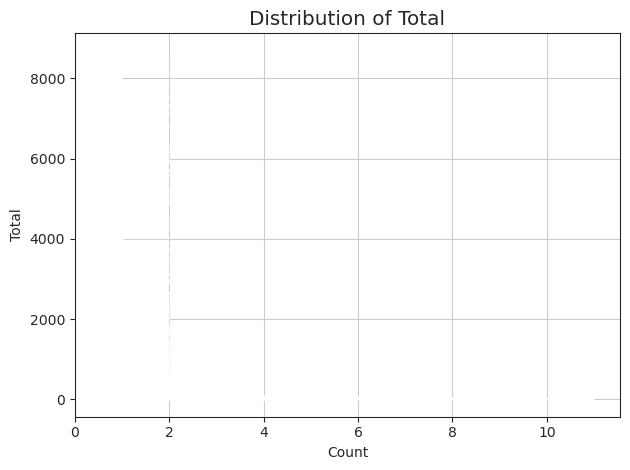

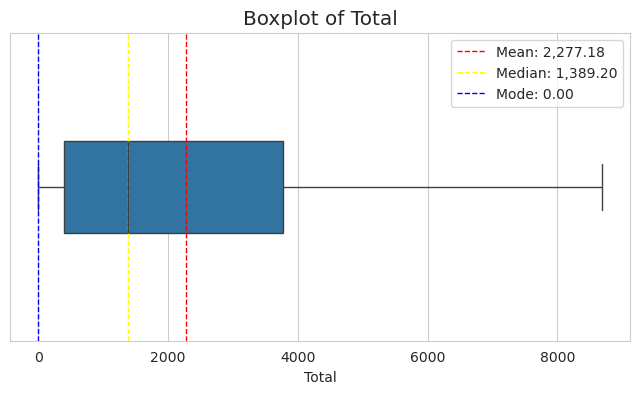

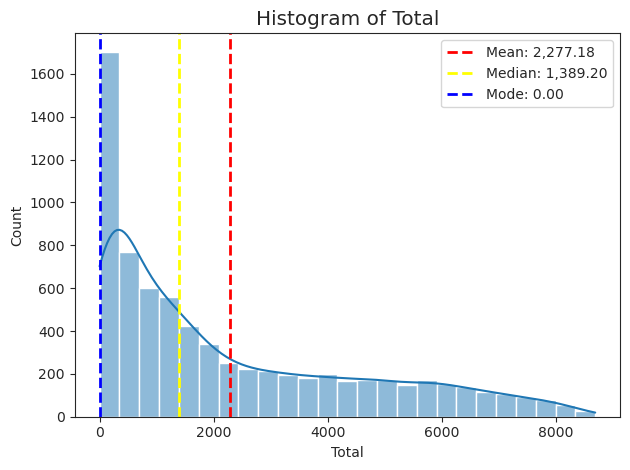

In [23]:
explore_distribution(df, 'Total')

##### Tenure

=> Exploration of Tenure:

Tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    0.239523
kurtosis   -1.388981
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64
------------------------------


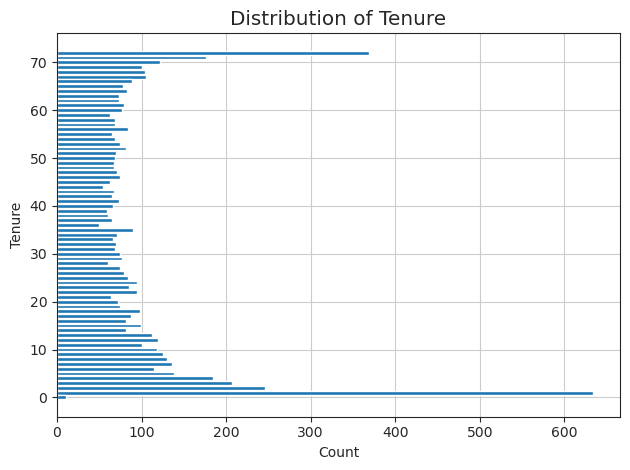

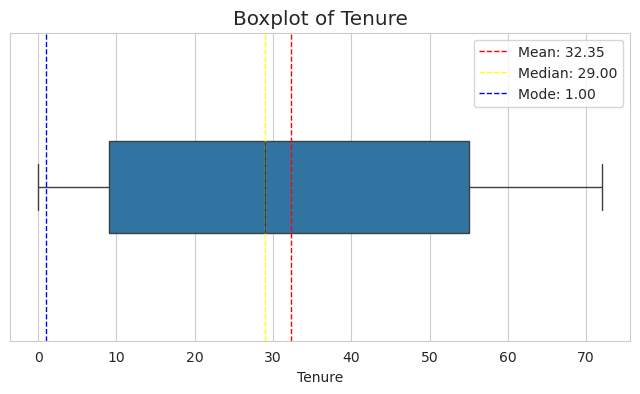

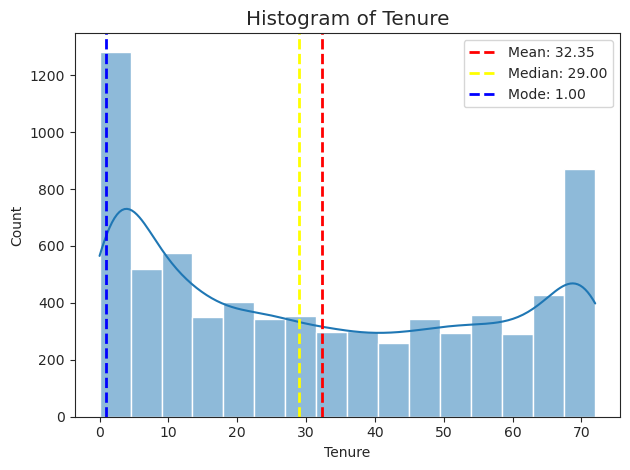

In [24]:
explore_distribution(df, 'Tenure')

#### Considerations

1. The continous features ['Monthly', 'Daily', 'Total', 'Tenure'] are right-skewed and uneven.

2. The possibility of binning is not fit for ['Monthly', 'Daily', 'Total'], but may be a good strategy for 'Tenure'

#### Tenure: Test binning strategies

Checking the possibility of binning the 'Tenure' feature:
> "Tenure" feature is composed of continous unique values in the range of 0 to 72 months. Hence, a good candidate for binning. This section will explore the best approach, if any, for binning this feature.

##### Binning

In [25]:
def categorize_tenure(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]:
    """
    Categorize the 'Tenure' feature into different groups using two approaches.

    The first approach divides the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years.
    The second approach divides the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years.
    The third approach uses quantiles to divide the tenure into four groups.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the 'Tenure' column to be categorized.

    Returns
    -------
    Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]
        Modified DataFrame with 'TenureGroup1', 'TenureGroup2' and 'TenureGroupQuantile' columns,
        and three dictionaries for mapping the group codes to descriptive strings.
    """

    # Approach 1
    # Divide the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years
    bins1: List[int] = [0, 12, 36, 60, 72]
    labels1: List[int] = [0, 1, 2, 3]
    df['TenureGroup1'] = pd.cut(df['Tenure'], bins=bins1, labels=labels1, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group1_mapping: Dict[int, str] = {
        0: '< 1 year',
        1: '1 - 3 years',
        2: '3 - 5 years',
        3: '> 5 years'
    }

    # Approach 2
    # Divide the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years
    bins2: List[int] = [0, 6, 24, 48, 72]
    labels2: List[int] = [0, 1, 2, 3]
    df['TenureGroup2'] = pd.cut(df['Tenure'], bins=bins2, labels=labels2, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group2_mapping: Dict[int, str] = {
        0: '< 6 months',
        1: '6 months - 2 years',
        2: '2 - 4 years',
        3: '> 4 years'
    }

    # Approach 3
    # Divide the tenure into four groups using quantiles
    df['TenureGroupQuantile'] = pd.qcut(df['Tenure'], q=4, labels=False)

    # Mapping for group codes to descriptive strings
    tenure_group_quantile_mapping: Dict[int, str] = {
        0: '1st quartile (lowest 25%)',
        1: '2nd quartile (25%-50%)',
        2: '3rd quartile (50%-75%)',
        3: '4th quartile (highest 25%)'
    }

    return df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping

In [26]:
df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping = categorize_tenure(df)

##### Testing

=> Exploration of TenureGroup1:

TenureGroup1
0.0    2254
1.0    1908
2.0    1643
3.0    1451
Name: count, dtype: int64
------------------------------
Info:

skewness    0.226847
kurtosis   -1.306616
count    7256.000000
mean        1.315739
std         1.112404
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroup1, dtype: float64
------------------------------


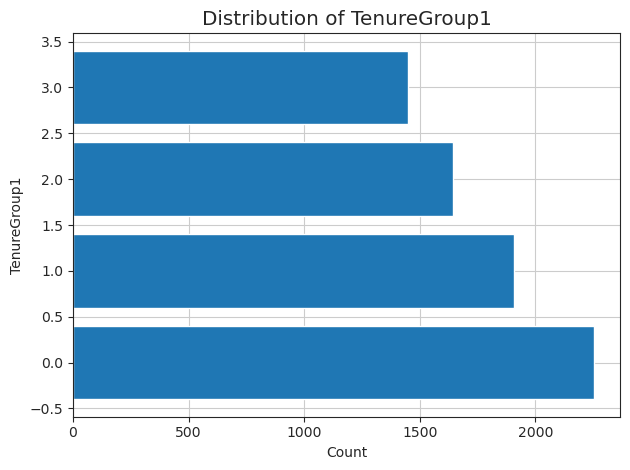

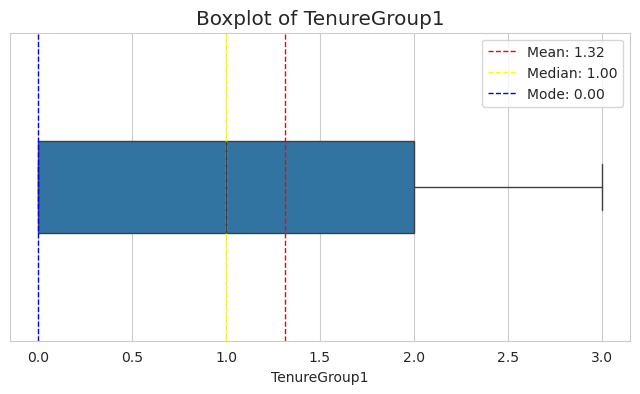

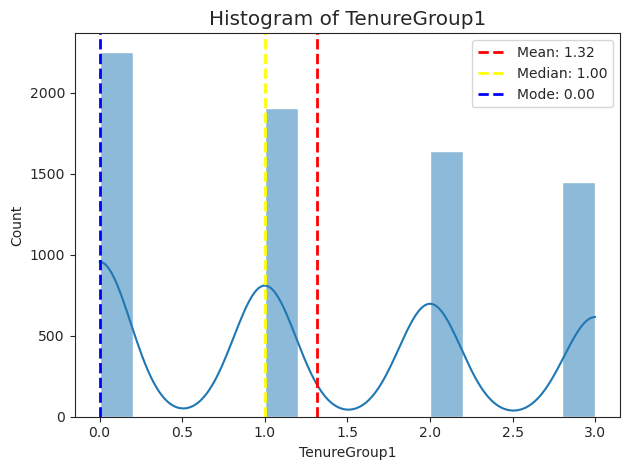

=> Exploration of TenureGroup2:

TenureGroup2
3.0    2309
1.0    1774
2.0    1648
0.0    1525
Name: count, dtype: int64
------------------------------
Info:

skewness    -0.159375
kurtosis   -1.381858
count    7256.000000
mean        1.653390
std         1.132885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: TenureGroup2, dtype: float64
------------------------------


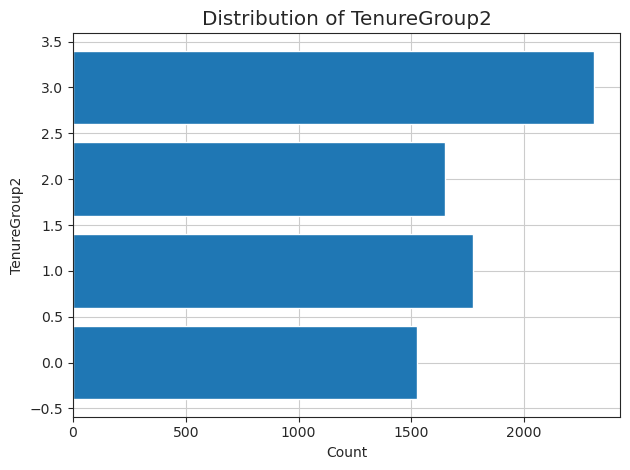

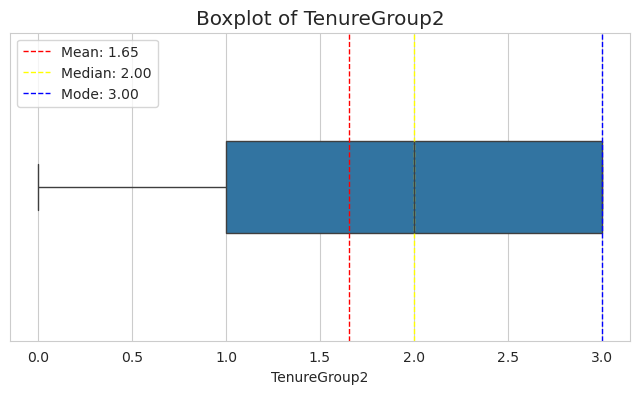

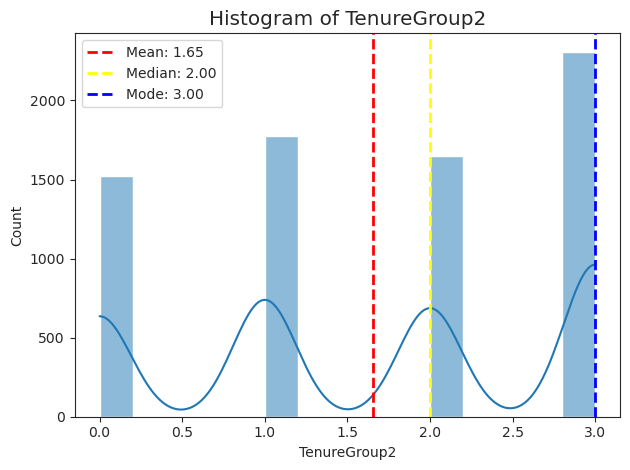

=> Exploration of TenureGroupQuantile:

TenureGroupQuantile
0    1927
3    1813
2    1770
1    1757
Name: count, dtype: int64
------------------------------
Info:

skewness    0.023608
kurtosis   -1.388869
count    7267.000000
mean        1.477363
std         1.130917
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroupQuantile, dtype: float64
------------------------------


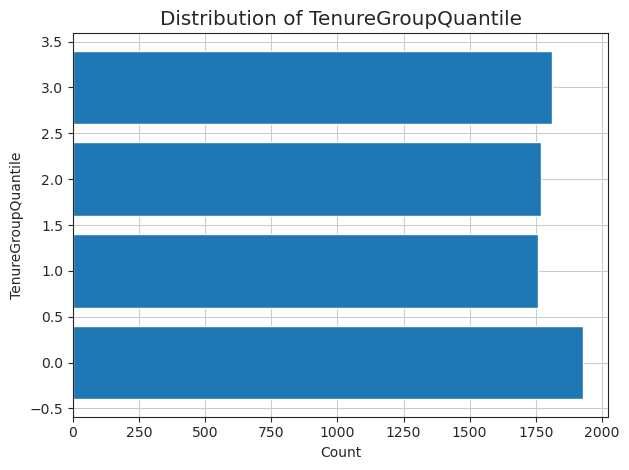

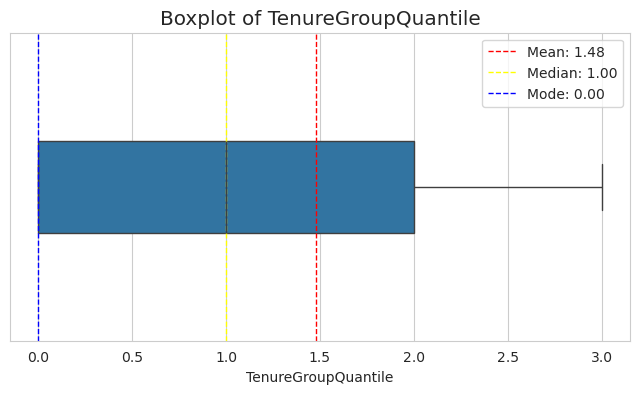

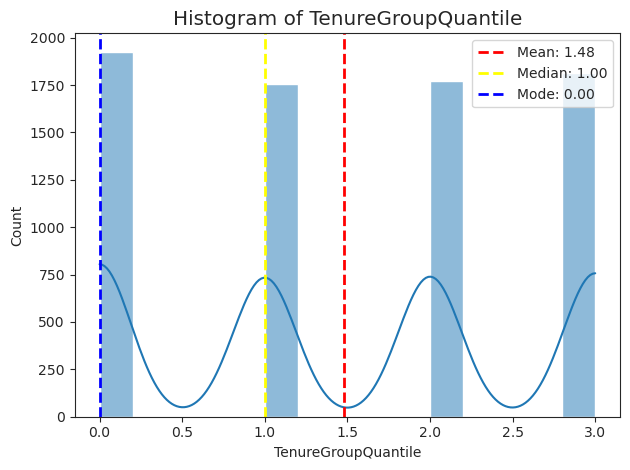

In [27]:
explore_distribution(df, 'TenureGroup1')
explore_distribution(df, 'TenureGroup2')
explore_distribution(df, 'TenureGroupQuantile')

##### Considerations

1. The 'tenure' is right-skewed distributed with an explosion for values >= 70 months.

2. All the approaches were unfair with the original data distribution, leading to loss of important information.
3. The most conservative approach of keeping the original data distribution was selected for this project.
Values will be scaled alongside with the continous features ['Monthly', 'Daily', 'Total']

In [28]:
df.drop(columns=['TenureGroup1', 'TenureGroup2', 'TenureGroupQuantile'], inplace=True)